In [6]:
import http.client
import pandas as pd

# Establish connection
conn = http.client.HTTPSConnection("netflix-api10.p.rapidapi.com")

# Headers
headers = {
    'x-rapidapi-key': "b724bf3ad7msh3c2543af95ea52fp1fc9a1jsnde15815aae4f",
    'x-rapidapi-host': "netflix-api10.p.rapidapi.com"
}

# Initialize an empty list to store responses
data_list = []

# Fetch data for pages 1 to 10
for page in range(1, 21):  # Pages 1 to 10
    conn.request("GET", f"/api/movies?page={page}", headers=headers)
    res = conn.getresponse()
    data = res.read().decode("utf-8")  # Decode the response
    print(f"Fetched data for page {page}")
    
    # Store the page number and data as a dictionary
    data_list.append({"page": page, "data": data})

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data_list)

# Save the DataFrame to a CSV file
csv_file = "movies_dataset3.csv"
try:
    # If the file already exists, append new data
    existing_df = pd.read_csv(csv_file)
    updated_df = pd.concat([existing_df, df], ignore_index=True)
except FileNotFoundError:
    # If the file doesn't exist, start with the new data
    updated_df = df

# Save the updated dataset
updated_df.to_csv(csv_file, index=False)
print(f"Dataset has been updated and saved to {csv_file}")


Fetched data for page 1
Fetched data for page 2
Fetched data for page 3
Fetched data for page 4
Fetched data for page 5
Fetched data for page 6
Fetched data for page 7
Fetched data for page 8
Fetched data for page 9
Fetched data for page 10
Fetched data for page 11
Fetched data for page 12
Fetched data for page 13
Fetched data for page 14
Fetched data for page 15
Fetched data for page 16
Fetched data for page 17
Fetched data for page 18
Fetched data for page 19
Fetched data for page 20
Dataset has been updated and saved to movies_dataset3.csv


In [7]:
import pandas as pd
import json

# Load the dataset
file_path = 'movies_dataset3.csv'  # Replace with your file path
movies_dataset = pd.read_csv(file_path)

# Function to parse the 'data' column and expand it into a structured format
def expand_data_column(df, data_column):
    # Convert the JSON-like strings to a proper format
    expanded_rows = []
    for idx, entry in df[data_column].items():
        try:
            # Parse JSON string into Python objects (list of dictionaries)
            json_data = json.loads(entry)
            if isinstance(json_data, list):
                for item in json_data:
                    expanded_rows.append(item)
        except json.JSONDecodeError:
            # Skip invalid JSON entries
            pass
    
    # Create a new DataFrame from the expanded rows
    return pd.DataFrame(expanded_rows)

# Expand the 'data' column into a structured dataset
expanded_dataset = expand_data_column(movies_dataset, 'data')

# Save the expanded dataset to a new CSV file
expanded_dataset.to_csv('expanded_movies_dataset3.csv', index=False)

# Display the first few rows of the expanded dataset
print(expanded_dataset.head())


                                             country  imdbAverageRating  \
0                                         AT, CH, DE                7.6   
1  AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ...                8.2   
2  AD, AE, AG, AO, BH, BM, BR, BS, BZ, CI, CM, CO...                7.0   
3  AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO...                8.2   
4  AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG...                8.3   

      imdbId  imdbNumVotes                  listed_in  release_year  \
0  tt0119116      519572.0  Action, Adventure, Sci-Fi        1997.0   
1  tt0266697     1229497.0    Action, Crime, Thriller        2003.0   
2  tt0418763      212892.0      Biography, Drama, War        2005.0   
3  tt0105695      446922.0             Drama, Western        1992.0   
4  tt0338013     1114902.0     Drama, Romance, Sci-Fi        2004.0   

                                   title   type  
0                      The Fifth Element  movie  
1                     

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load datasets
disney_df = pd.read_csv("disney_plus_shows.csv")
movies_df = pd.read_csv("expanded_movies_dataset3.csv")
amazon_df = pd.read_csv("amazon.csv")
netflix_df = pd.read_csv("Netflix.csv")


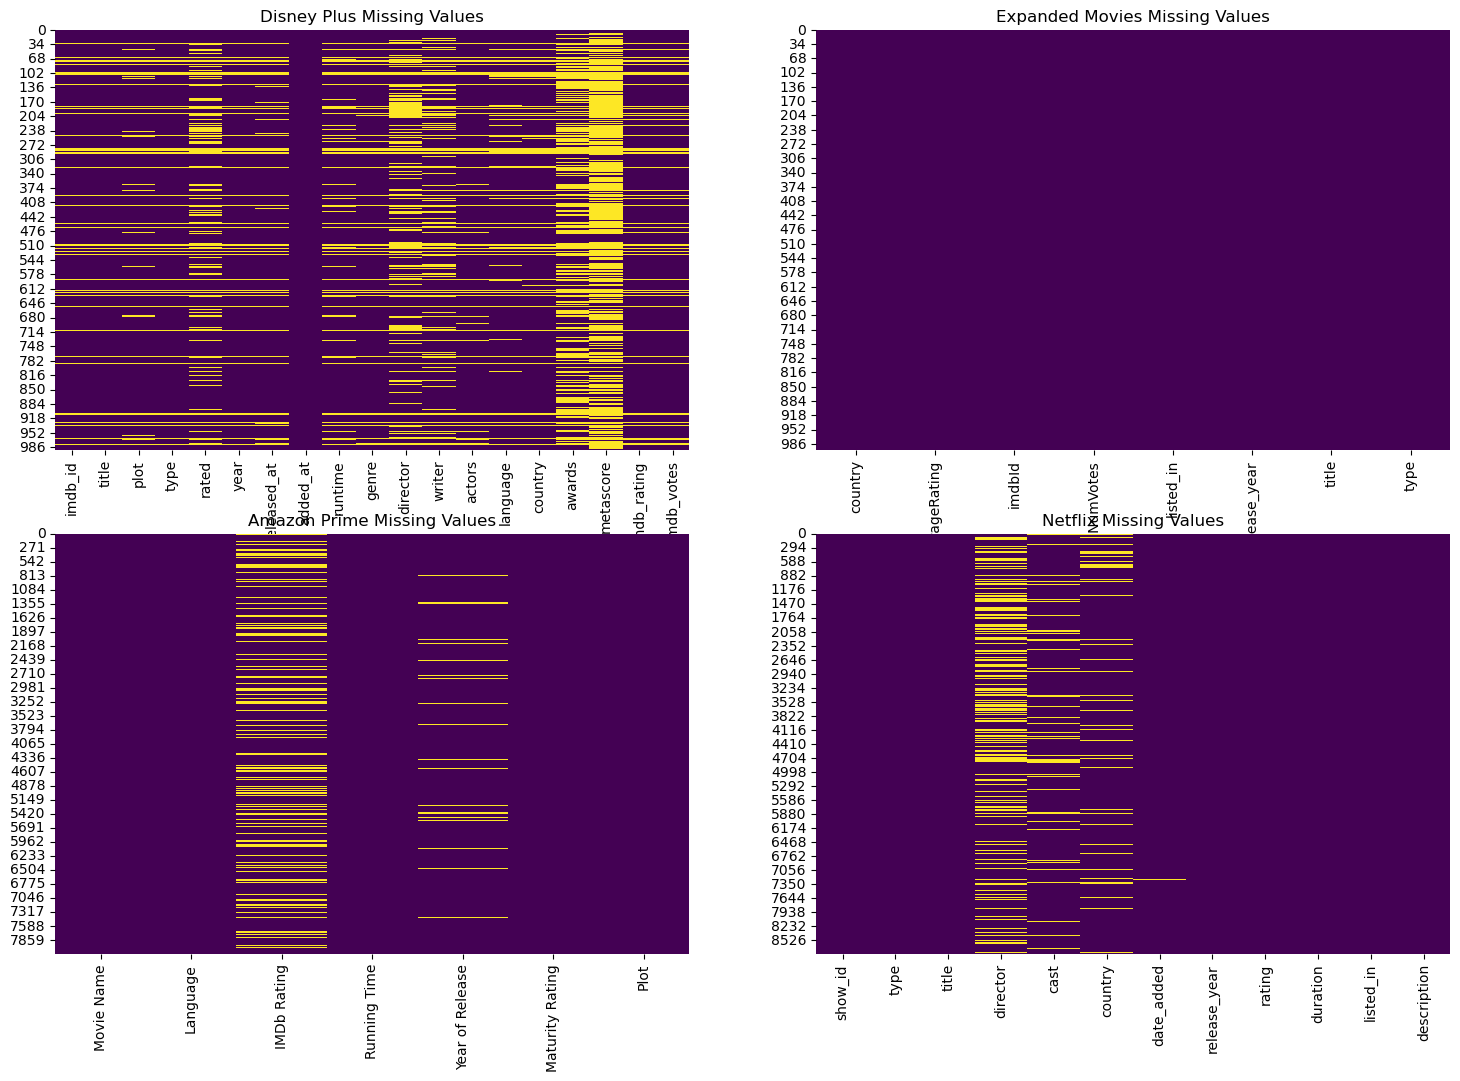

In [8]:
# Visualizing missing values using heatmaps
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.heatmap(disney_df.isna(), cmap='viridis', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title("Disney Plus Missing Values")

sns.heatmap(movies_df.isna(), cmap='viridis', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title("Expanded Movies Missing Values")

sns.heatmap(amazon_df.isna(), cmap='viridis', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title("Amazon Prime Missing Values")

sns.heatmap(netflix_df.isna(), cmap='viridis', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title("Netflix Missing Values")

plt.show()

In [10]:
# Function to check for duplicate rows
def check_duplicates(df, dataset_name):
    duplicate_count = df.duplicated().sum()
    print(f"Dataset: {dataset_name} - Duplicate Rows: {duplicate_count}")

# Check for duplicates in each dataset
check_duplicates(disney_df, "Disney+ Shows")
check_duplicates(movies_df, "Expanded Movies Dataset")
check_duplicates(amazon_df, "Amazon")
check_duplicates(netflix_df, "Netflix")

# Display the duplicate rows (optional)
duplicates_disney = disney_df[disney_df.duplicated()]
duplicates_movies = movies_df[movies_df.duplicated()]
duplicates_amazon = amazon_df[amazon_df.duplicated()]
duplicates_netflix = netflix_df[netflix_df.duplicated()]



Dataset: Disney+ Shows - Duplicate Rows: 74
Dataset: Expanded Movies Dataset - Duplicate Rows: 0
Dataset: Amazon - Duplicate Rows: 3
Dataset: Netflix - Duplicate Rows: 0


In [11]:
# Remove duplicates from datasets that have them
disney_df = disney_df.drop_duplicates()
amazon_df = amazon_df.drop_duplicates()

In [12]:
import random
# Drop columns that are not useful
disney_df.drop(columns=['metascore', 'released_at', 'added_at'], inplace=True, errors='ignore')
# Function to generate a random unique 'imdb_id'
def generate_unique_imdb_id(existing_ids):
    while True:
        random_id = "tt" + str(random.randint(1000000, 9999999))
        if random_id not in existing_ids:
            return random_id

# Replace missing 'imdb_id' with random unique values
existing_imdb_ids = set(disney_df['imdb_id'].dropna().unique())
disney_df['imdb_id'] = disney_df['imdb_id'].apply(lambda x: generate_unique_imdb_id(existing_imdb_ids) if pd.isna(x) else x)
# Drop rows where 'plot' is missing
disney_df.dropna(subset=['plot'], inplace=True)

# Generate title from plot if missing
disney_df['title'] = disney_df.apply(lambda row: row['plot'][:30] + "..." if pd.isna(row['title']) else row['title'], axis=1)

# Replace missing genre values with the most common genre
most_common_genre = disney_df['genre'].mode()[0] if not disney_df['genre'].mode().empty else "Unknown"
disney_df['genre'].fillna(most_common_genre, inplace=True)

# Convert runtime to numeric
disney_df['runtime'] = pd.to_numeric(disney_df['runtime'], errors='coerce')

# Map median runtime by type
type_runtime_map = disney_df.groupby('type')['runtime'].median().to_dict()

# Fill missing type values based on closest runtime
disney_df['type'] = disney_df.apply(lambda row: min(type_runtime_map, key=lambda k: abs(type_runtime_map[k] - row['runtime']))
                                    if pd.isna(row['type']) else row['type'], axis=1)
# Replace 'rated' based on genre's most common rating
genre_rated_map = disney_df.groupby('genre')['rated'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
disney_df['rated'] = disney_df.apply(lambda row: genre_rated_map[row['genre']] if pd.isna(row['rated']) else row['rated'], axis=1)

# Extract year from plot if available
disney_df['year'] = disney_df.apply(lambda row: row['plot'][-4:] if pd.isna(row['year']) and row['plot'][-4:].isdigit() else row['year'], axis=1)

# Replace missing 'runtime' based on 'type'
type_median_runtime = disney_df.groupby('type')['runtime'].median()
disney_df['runtime'] = disney_df.apply(lambda row: type_median_runtime[row['type']] if pd.isna(row['runtime']) else row['runtime'], axis=1)

# Replace missing 'director' based on genre
genre_director_map = disney_df.groupby('genre')['director'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
disney_df['director'] = disney_df.apply(lambda row: genre_director_map[row['genre']] if pd.isna(row['director']) else row['director'], axis=1)

# Replace missing 'writer' based on genre
genre_writer_map = disney_df.groupby('genre')['writer'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
disney_df['writer'] = disney_df.apply(lambda row: genre_writer_map[row['genre']] if pd.isna(row['writer']) else row['writer'], axis=1)

# Replace 'actors' with the most frequent actor
most_frequent_actor = disney_df['actors'].mode()[0] if not disney_df['actors'].mode().empty else "Unknown"
disney_df['actors'].fillna(most_frequent_actor, inplace=True)

# Fill missing 'country' values
most_common_country = disney_df['country'].mode()[0] if not disney_df['country'].mode().empty else "Unknown"
disney_df['country'].fillna(most_common_country, inplace=True)

# Replace 'language' based on country safely
country_language_map = disney_df.groupby('country')['language'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
disney_df['language'] = disney_df.apply(lambda row: country_language_map.get(row['country'], "Unknown") if pd.isna(row['language']) else row['language'], axis=1)

# Replace 'awards' with "No Awards" where missing
disney_df['awards'].fillna("No Awards", inplace=True)

# Convert 'imdb_votes' to numeric by removing commas
disney_df['imdb_votes'] = disney_df['imdb_votes'].astype(str).str.replace(',', '').astype(float)

# Fill missing 'imdb_votes' with median
imdb_votes_median = disney_df['imdb_votes'].median()
disney_df['imdb_votes'].fillna(imdb_votes_median, inplace=True)

# Replace 'imdb_rating' based on genre
genre_imdb_map = disney_df.groupby('genre')['imdb_rating'].median()
disney_df['imdb_rating'] = disney_df.apply(lambda row: genre_imdb_map[row['genre']] if pd.isna(row['imdb_rating']) else row['imdb_rating'], axis=1)

# Save the cleaned Disney dataset
disney_df.to_csv("cleaned_Disney1.csv", index=False)

print("Cleaned Disney+ dataset saved successfully!")




Cleaned Disney+ dataset saved successfully!


/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_25983/981929671.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  disney_df['genre'].fillna(most_common_genre, inplace=True)
/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_25983/981929671.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [13]:
# Identify columns with missing values
missing_values = amazon_df.isna().sum()

# Filter for columns where missing values exist
columns_with_missing = missing_values[missing_values > 0].index.tolist()

# Print missing value details
print("Columns with Missing Values:", columns_with_missing)

# Drop rows where any of the specified columns have missing values
amazon_df_cleaned = amazon_df.dropna(subset=columns_with_missing)

# Save cleaned dataset
amazon_df_cleaned.to_csv("cleaned_Amazon1.csv", index=False)

print("Cleaned Amazon dataset saved successfully!")



Columns with Missing Values: ['IMDb Rating', 'Year of Release', 'Plot']
Cleaned Amazon dataset saved successfully!


In [14]:
# Remove rows where 'director', 'cast', or 'country' is missing
netflix_df_cleaned = netflix_df.dropna(subset=['director', 'cast', 'country'])

# Create mappings for filling missing 'country' values
director_country_map = netflix_df_cleaned.groupby('director')['country'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")
cast_country_map = netflix_df_cleaned.groupby('cast')['country'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")

# Fill missing 'country' values based on director or cast
netflix_df_cleaned['country'] = netflix_df_cleaned.apply(
    lambda row: director_country_map[row['director']] if pd.isna(row['country']) and row['director'] in director_country_map
    else (cast_country_map[row['cast']] if pd.isna(row['country']) and row['cast'] in cast_country_map else row['country']), axis=1)

# Create mappings for filling missing 'cast' values
director_cast_map = netflix_df_cleaned.groupby(['director', 'country'])['cast'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")

# Fill missing 'cast' values based on director and country
netflix_df_cleaned['cast'] = netflix_df_cleaned.apply(
    lambda row: director_cast_map[(row['director'], row['country'])] if pd.isna(row['cast']) and (row['director'], row['country']) in director_cast_map
    else row['cast'], axis=1)

# Create mappings for filling missing 'director' values
cast_director_map = netflix_df_cleaned.groupby(['cast', 'country'])['director'].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")

# Fill missing 'director' values based on cast and country
netflix_df_cleaned['director'] = netflix_df_cleaned.apply(
    lambda row: cast_director_map[(row['cast'], row['country'])] if pd.isna(row['director']) and (row['cast'], row['country']) in cast_director_map
    else row['director'], axis=1)

# Save the cleaned Netflix dataset
netflix_df_cleaned.to_csv("cleaned_Netflix1.csv", index=False)

print("Cleaned Netflix dataset saved successfully!")


/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_25983/3625146706.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_cleaned['country'] = netflix_df_cleaned.apply(
/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_25983/3625146706.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_cleaned['cast'] = netflix_df_cleaned.apply(


Cleaned Netflix dataset saved successfully!


/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_25983/3625146706.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_cleaned['director'] = netflix_df_cleaned.apply(


In [26]:
# Load the CSV file
file_path = "cleaned_Amazon1.csv"
df = pd.read_csv(file_path)

# Remove the 'maturity_ratings' column if it exists
if 'Maturity Rating' in df.columns:
    df.drop(columns=['Maturity Rating'], inplace=True)
    
modified_file_path = "cleaned_Amazon1_updated.csv"
df.to_csv(modified_file_path, index=False)

print(f"Modified file saved as {modified_file_path}")

Modified file saved as cleaned_Amazon1_updated.csv


In [27]:
# Load the CSV file
file_path = "cleaned_Disney1.csv"
df = pd.read_csv(file_path)

# Remove the 'maturity_ratings' column if it exists
if 'runtime' in df.columns:
    df.drop(columns=['runtime'], inplace=True)

# Function to update range-based year values
def clean_year(value):
    value_str = str(value).strip()
    if value_str.endswith("–"):
        return f"{value_str}2024"  # Append 2024 to incomplete ranges
    return value_str

# Apply the function to the 'year' column
if 'year' in df.columns:
    df['year'] = df['year'].apply(clean_year)

# Save the modified file
modified_file_path = "cleaned_Disney1_fixed.csv"
df.to_csv(modified_file_path, index=False)

print(f"Modified file saved as {modified_file_path}")

Modified file saved as cleaned_Disney1_fixed.csv


In [28]:


# Clean all datasets
disney_cleaned = pd.read_csv("cleaned_Disney1_fixed.csv")
movies_cleaned = pd.read_csv("expanded_movies_dataset3.csv")
amazon_cleaned = pd.read_csv("cleaned_Amazon1_updated.csv")
netflix_cleaned = pd.read_csv("cleaned_Netflix1.csv")


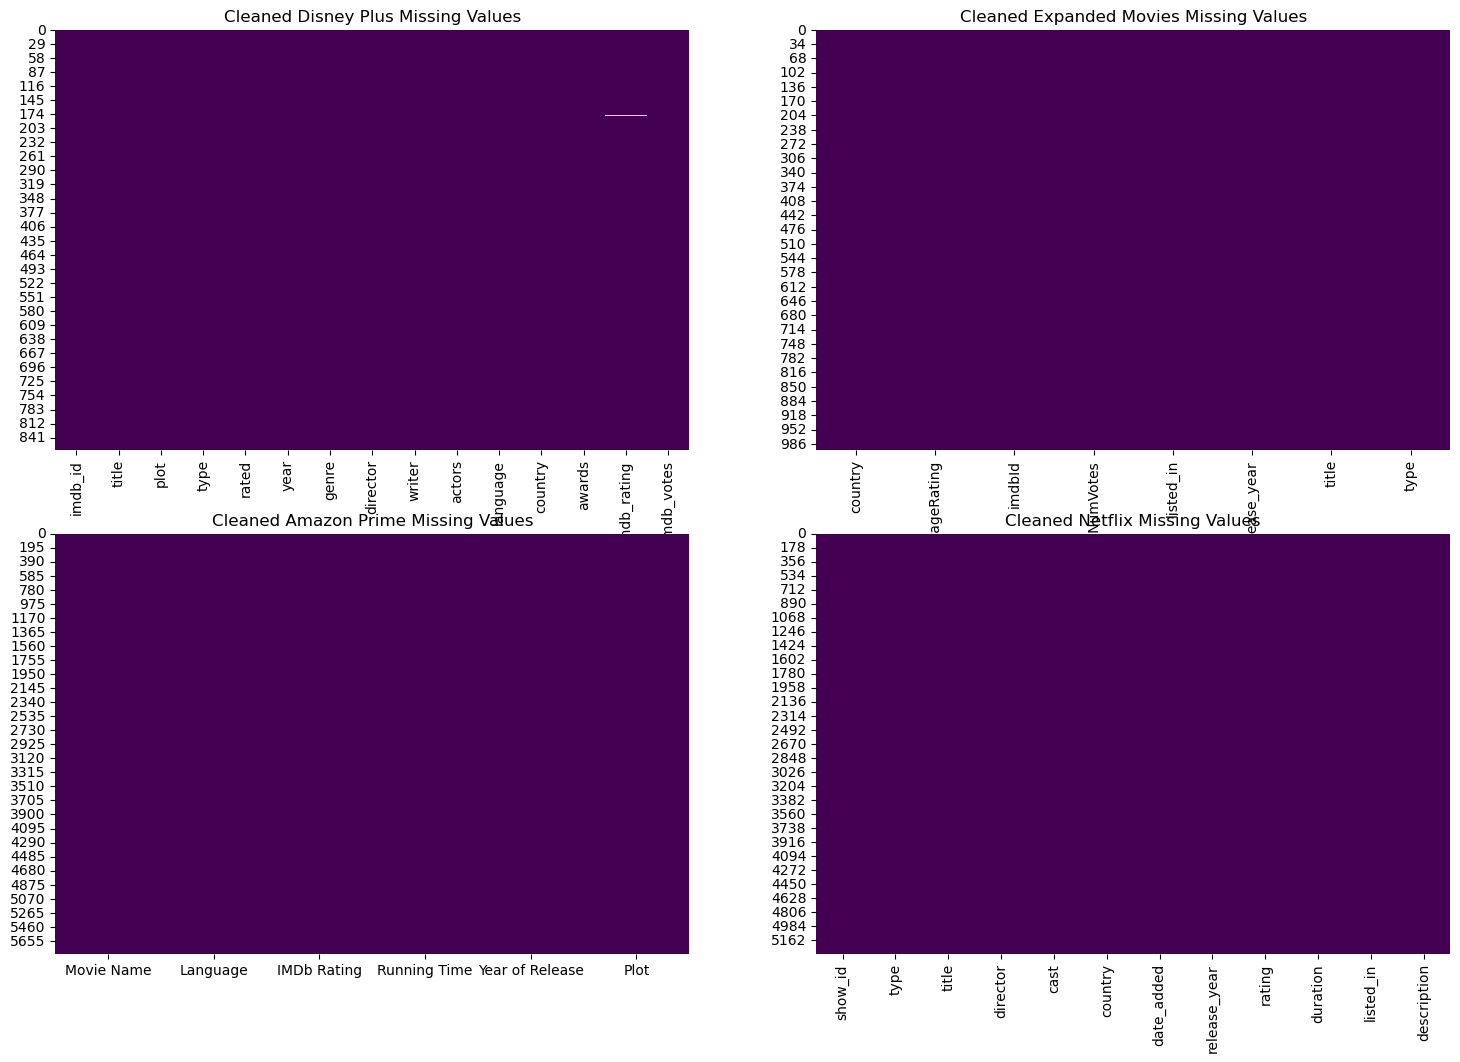

In [29]:
# Visualizing missing values after cleaning
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.heatmap(disney_cleaned.isna(), cmap='viridis', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title("Cleaned Disney Plus Missing Values")

sns.heatmap(movies_cleaned.isna(), cmap='viridis', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title("Cleaned Expanded Movies Missing Values")

sns.heatmap(amazon_cleaned.isna(), cmap='viridis', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title("Cleaned Amazon Prime Missing Values")

sns.heatmap(netflix_cleaned.isna(), cmap='viridis', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title("Cleaned Netflix Missing Values")

plt.show()


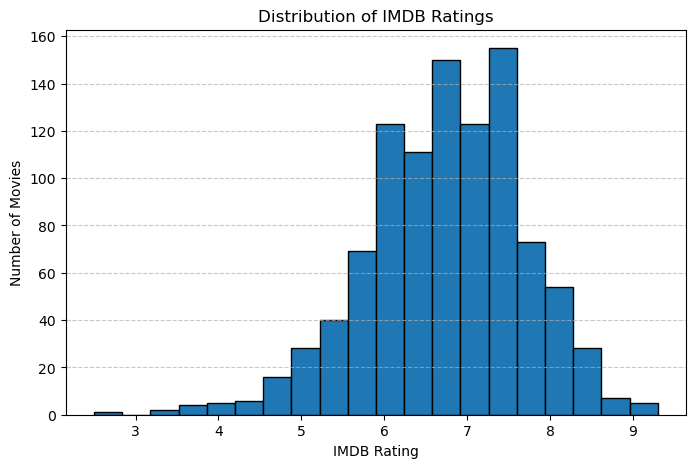

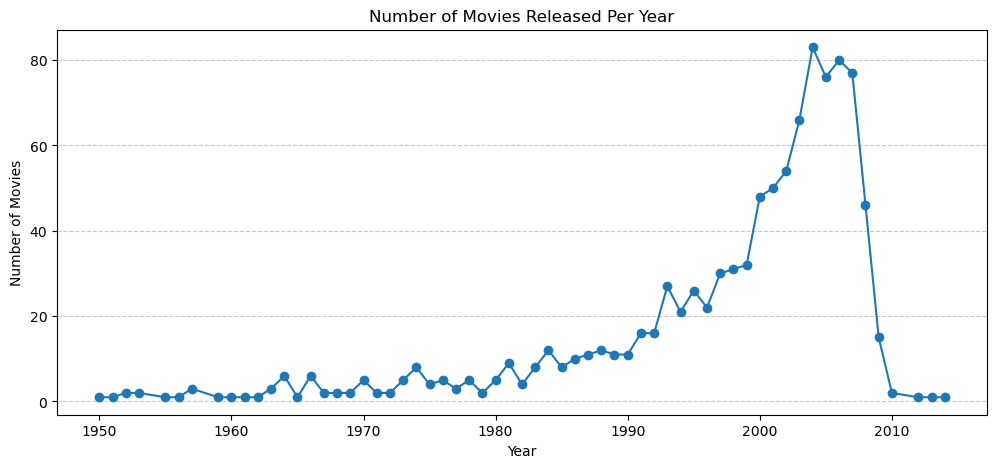

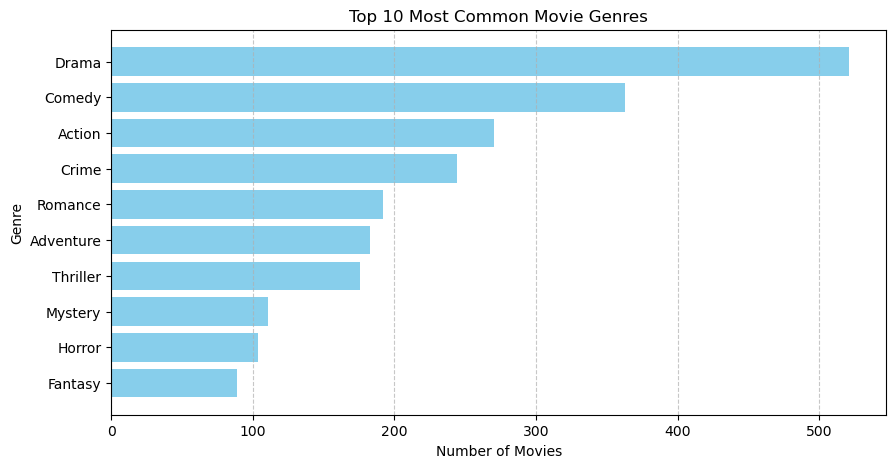

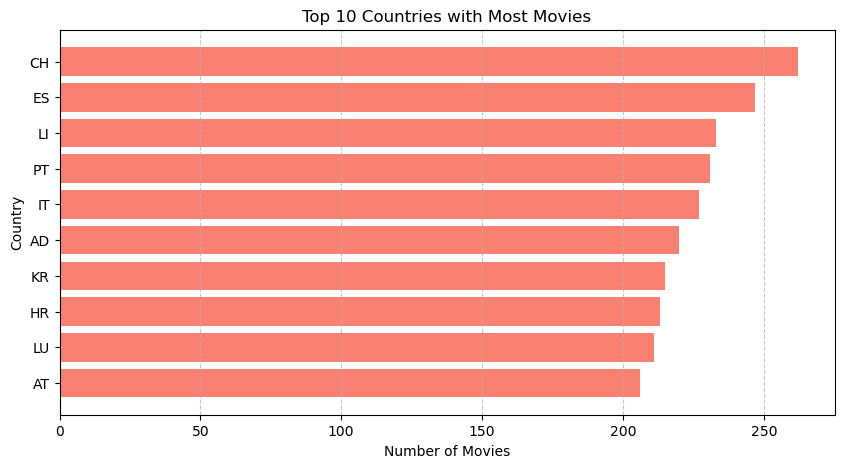

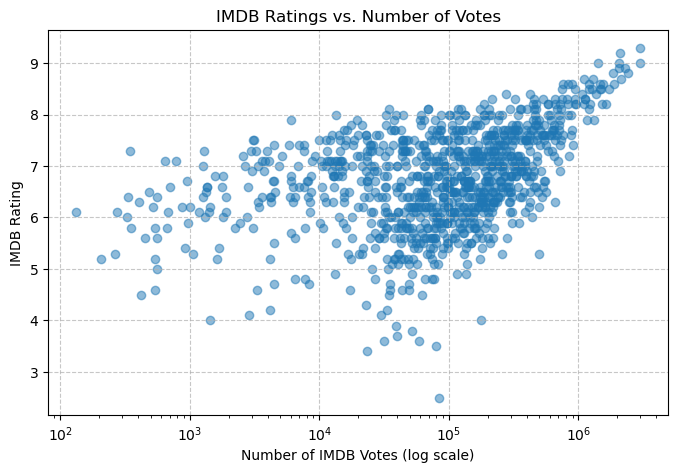

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
file_path = "expanded_movies_dataset3.csv"
df = pd.read_csv(file_path)

# Visualization 1: Distribution of IMDB Ratings
plt.figure(figsize=(8, 5))
plt.hist(df['imdbAverageRating'], bins=20, edgecolor='black')
plt.xlabel("IMDB Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of IMDB Ratings")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization 2: Number of Movies Released Per Year
movies_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Per Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization 3: Top 10 Most Common Movie Genres
genre_list = [genre for sublist in df['listed_in'].str.split(', ') for genre in sublist]
genre_counts = Counter(genre_list)
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

plt.figure(figsize=(10, 5))
plt.barh(genres[::-1], counts[::-1], color='skyblue')
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Top 10 Most Common Movie Genres")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization 4: Top 10 Countries with Most Movies
country_list = [country for sublist in df['country'].str.split(', ') for country in sublist]
country_counts = Counter(country_list)
top_countries = country_counts.most_common(10)
countries, counts = zip(*top_countries)

plt.figure(figsize=(10, 5))
plt.barh(countries[::-1], counts[::-1], color='salmon')
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.title("Top 10 Countries with Most Movies")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization 5: IMDB Ratings vs. Number of Votes
plt.figure(figsize=(8, 5))
plt.scatter(df['imdbNumVotes'], df['imdbAverageRating'], alpha=0.5)
plt.xscale('log')  # Log scale to handle large variance in vote counts
plt.xlabel("Number of IMDB Votes (log scale)")
plt.ylabel("IMDB Rating")
plt.title("IMDB Ratings vs. Number of Votes")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


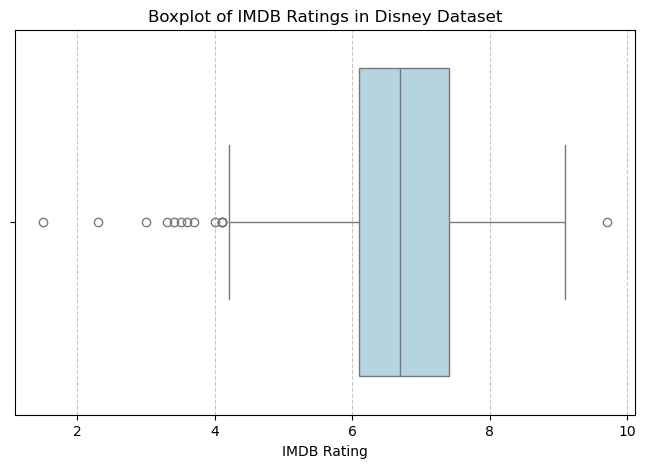

/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_25983/3836343580.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movies_per_decade.index.astype(int), y=movies_per_decade.values, palette="coolwarm")


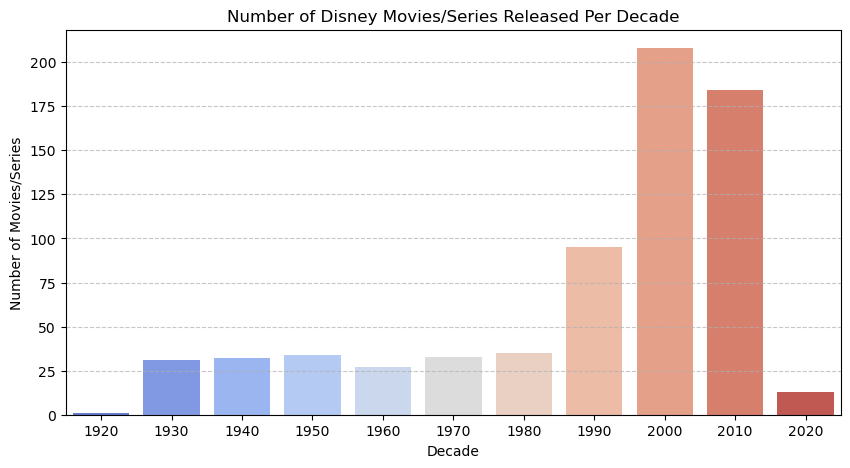

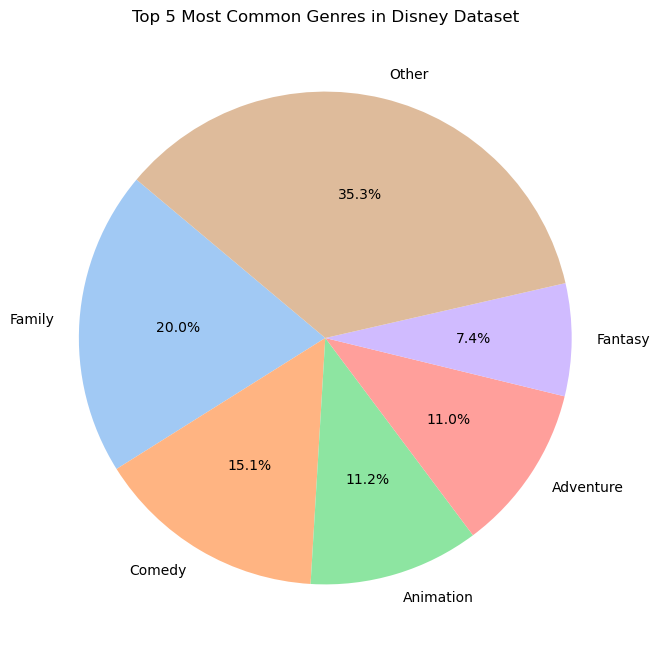

In [31]:
# Load the dataset
file_path_disney = "cleaned_Disney1_fixed.csv"
df_disney = pd.read_csv(file_path_disney)

# Convert year column to numeric
df_disney['year'] = pd.to_numeric(df_disney['year'], errors='coerce')

# Visualization 1: Boxplot of IMDB Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_disney['imdb_rating'], color='lightblue')
plt.xlabel("IMDB Rating")
plt.title("Boxplot of IMDB Ratings in Disney Dataset")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Visualization 2: Bar Chart of Movies/Series Released Per Decade
df_disney['decade'] = (df_disney['year'] // 10) * 10  # Group by decade
movies_per_decade = df_disney['decade'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=movies_per_decade.index.astype(int), y=movies_per_decade.values, palette="coolwarm")
plt.xlabel("Decade")
plt.ylabel("Number of Movies/Series")
plt.title("Number of Disney Movies/Series Released Per Decade")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization 3: Pie Chart of Top 5 Most Common Genres
genre_list = [genre for sublist in df_disney['genre'].str.split(', ') for genre in sublist]
genre_counts = Counter(genre_list)
top_5_genres = dict(genre_counts.most_common(5))
other_count = sum(genre_counts.values()) - sum(top_5_genres.values())
top_5_genres["Other"] = other_count

plt.figure(figsize=(8, 8))
plt.pie(top_5_genres.values(), labels=top_5_genres.keys(), autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Top 5 Most Common Genres in Disney Dataset")
plt.show()


/var/folders/pv/byryysg97h9dgc4sfsdqc_tm0000gn/T/ipykernel_25983/3813583546.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Language', y='IMDb Rating', data=df_top_languages, palette='coolwarm')


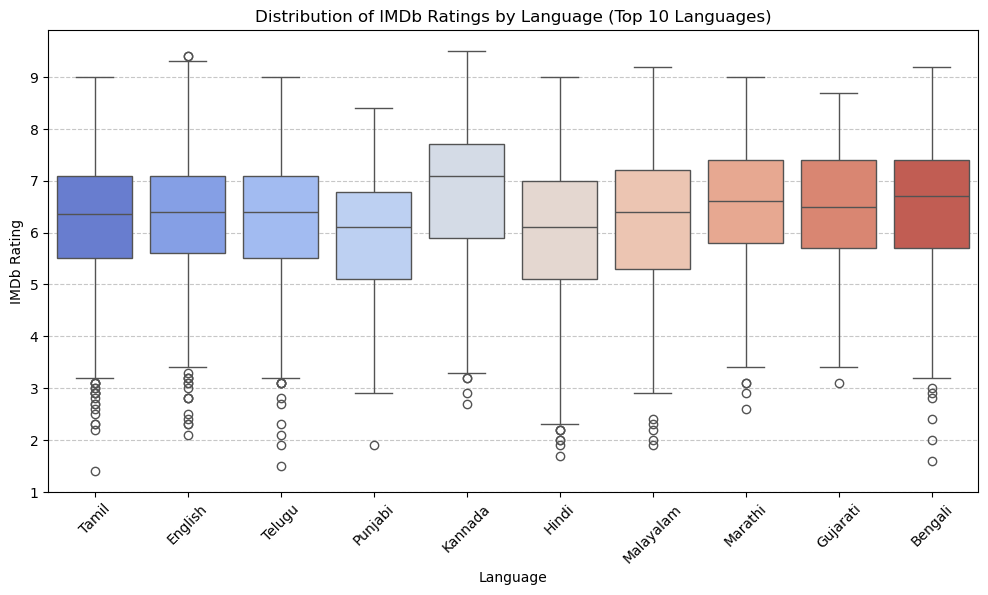

In [32]:
# Load the dataset
file_path_amazon = "cleaned_Amazon1_updated.csv"
df_amazon = pd.read_csv(file_path_amazon)

# Convert IMDb Rating to numeric
df_amazon['IMDb Rating'] = pd.to_numeric(df_amazon['IMDb Rating'], errors='coerce')

# Select top 10 most common languages
top_languages = df_amazon['Language'].value_counts().nlargest(10).index
df_top_languages = df_amazon[df_amazon['Language'].isin(top_languages)]

# Create a boxplot of IMDb Ratings by Language (Top 10 Languages)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Language', y='IMDb Rating', data=df_top_languages, palette='coolwarm')
plt.xlabel("Language")
plt.ylabel("IMDb Rating")
plt.title("Distribution of IMDb Ratings by Language (Top 10 Languages)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
import pandas as pd
# Load the datasets
file_path_disney = "cleaned_Disney1_fixed.csv"
file_path_netflix = "cleaned_Netflix1.csv"

df_disney = pd.read_csv(file_path_disney)
df_netflix = pd.read_csv(file_path_netflix)

# Function to replace outliers with the minimum value in the column
def replace_outliers_with_min(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR

    min_value = df[column].min()  # Find the minimum value in the column
    df[column] = df[column].apply(lambda x: min_value if x < lower_bound else x)
    return df

# Identify numerical columns
numerical_columns_disney = df_disney.select_dtypes(include=['number']).columns
numerical_columns_netflix = df_netflix.select_dtypes(include=['number']).columns

# Apply outlier replacement for each dataset
for col in numerical_columns_disney:
    df_disney = replace_outliers_with_min(df_disney, col)

for col in numerical_columns_netflix:
    df_netflix = replace_outliers_with_min(df_netflix, col)

# Save the updated datasets (optional)
df_disney.to_csv("cleaned_Disney1_outliers_fixed.csv", index=False)
df_netflix.to_csv("cleaned_Netflix1_outliers_fixed.csv", index=False)



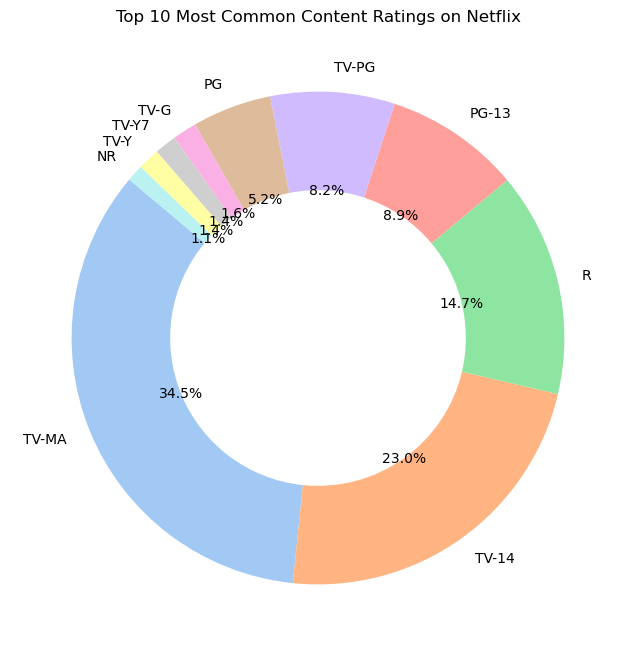

In [41]:
# Load the dataset
file_path_netflix = "cleaned_Netflix1.csv"
df_netflix = pd.read_csv(file_path_netflix)

# Count the number of movies/TV shows per rating category
rating_counts = df_netflix['rating'].value_counts().nlargest(10)  # Select top 10 ratings

# Create a donut chart for the most common content ratings
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel"), startangle=140, 
        wedgeprops=dict(width=0.4))  # Making it a donut chart
plt.title("Top 10 Most Common Content Ratings on Netflix")
plt.show()